In [1]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [2]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 100
n_redundant = 200
n_repeated = 0
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=2,
    shuffle=False,
    shift=25,
)


In [3]:
(X < 0).sum()

45806

In [4]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [5]:

X = pd.DataFrame(X, columns=[f'Protein_{i+1}' for i in range(n_features)])

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,21.564307,33.166160,25.650801,33.180446,28.392508,24.733976,33.477774,31.085660,20.656709,29.553184,...,24.029324,25.946993,25.175497,23.726102,25.651818,23.973245,26.203293,26.108558,24.189722,25.606267
1,20.101983,23.991026,12.699208,18.353943,27.254581,21.014142,24.874518,26.490866,28.737731,40.668323,...,25.660921,23.998590,24.036090,25.068835,27.338225,24.563628,26.485737,25.581668,27.038869,24.228422
2,29.772507,24.889565,17.367669,29.886376,30.541666,33.679653,21.435994,25.021013,16.772088,29.098106,...,24.854929,24.447494,24.409115,22.741566,24.191442,24.252065,26.202022,25.751897,25.090069,23.575576
3,29.362562,18.129390,16.527802,18.590741,23.807995,34.943076,18.883772,18.910565,18.699290,12.443864,...,24.401629,23.913042,24.412237,24.985067,25.596117,22.993266,24.972967,23.451513,22.172787,27.344771
4,22.677654,25.089983,28.222872,29.302158,28.920763,22.649509,26.579445,13.815794,23.828193,23.096441,...,25.180026,25.258933,24.120300,25.710082,23.798022,25.345990,26.330182,25.876241,24.535496,24.429430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.255356,24.989891,22.743561,12.252413,32.641946,15.119072,17.700483,29.562724,17.159962,29.236688,...,26.180442,26.195139,26.424350,24.495323,23.299404,25.882541,24.103675,22.761193,25.728846,25.353697
996,20.539902,25.589179,18.653880,20.763617,20.001544,19.268570,32.822987,23.746836,25.714892,21.406553,...,26.685025,24.688871,26.733875,25.705503,24.910345,25.614353,25.172660,23.859703,25.694995,24.609165
997,14.991714,19.848960,30.891902,25.448906,28.422100,15.345494,35.585313,28.167172,29.484175,19.883902,...,25.992538,25.400289,24.970823,25.558375,24.979839,25.703496,24.988168,24.931133,23.907753,24.364584
998,29.150907,26.174436,25.330895,26.041951,18.258802,22.083512,16.918916,20.923400,27.268864,28.235925,...,27.447935,25.206822,25.388353,23.285179,23.972618,23.702867,26.133583,24.522549,25.607876,24.226362


In [6]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [10]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

In [11]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

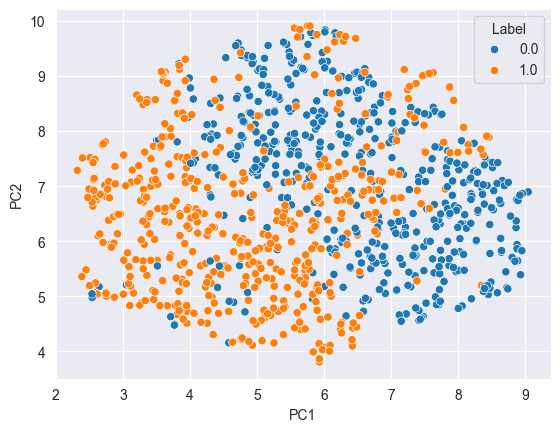

In [12]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [16]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#import xgboost

from sklearn.experimental import enable_hist_gradient_boosting  # Enables HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np

model = HistGradientBoostingClassifier(random_state=42)
param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_iter': [100, 500],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_leaf': [10, 20, 30, 40, 50],
    'l2_regularization': np.logspace(-4, 0, 10),
    'max_leaf_nodes': [15, 31, 63, 127],
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=5,
)

random_search.fit(X, y)

print("Best hyperparameters:", random_search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'min_samples_leaf': 20, 'max_leaf_nodes': 15, 'max_iter': 500, 'max_depth': 9, 'learning_rate': 0.13, 'l2_regularization': 0.002154434690031882}


In [18]:
clf = random_search.best_estimator_

In [19]:
#clf.fit(X[:].values, y)

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, scoring='roc_auc', cv=5, n_jobs=1)

array([0.8017    , 0.8158    , 0.8523    , 0.82118212, 0.83658366])

In [21]:
from sklearn.feature_selection import f_classif

f_statistics, pvalues = f_classif(X, y)

In [22]:
from sklearn.inspection import permutation_importance


importances = permutation_importance(
    clf,
    X.values,
    y,
    scoring="neg_log_loss",
    n_jobs=1,
    #max_samples=0.5,
    n_repeats=3,
)

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

[CV] END l2_regularization=0.002154434690031882, learning_rate=0.19, max_depth=None, max_iter=500, max_leaf_nodes=127, min_samples_leaf=10; total time=  35.7s
[CV] END l2_regularization=0.0001, learning_rate=0.05, max_depth=5, max_iter=500, max_leaf_nodes=15, min_samples_leaf=10; total time=  46.3s
[CV] END l2_regularization=1.0, learning_rate=0.11, max_depth=9, max_iter=500, max_leaf_nodes=127, min_samples_leaf=40; total time=  38.8s
[CV] END l2_regularization=0.000774263682681127, learning_rate=0.17, max_depth=7, max_iter=100, max_leaf_nodes=15, min_samples_leaf=50; total time=  12.5s
[CV] END l2_regularization=0.0002782559402207126, learning_rate=0.12, max_depth=5, max_iter=500, max_leaf_nodes=31, min_samples_leaf=10; total time=  31.4s
[CV] END l2_regularization=0.005994842503189409, learning_rate=0.05, max_depth=5, max_iter=100, max_leaf_nodes=63, min_samples_leaf=10; total time=  16.8s
[CV] END l2_regularization=1.0, learning_rate=0.060000000000000005, max_depth=None, max_iter=50

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

[CV] END l2_regularization=0.002154434690031882, learning_rate=0.19, max_depth=None, max_iter=500, max_leaf_nodes=127, min_samples_leaf=10; total time=  36.3s
[CV] END l2_regularization=0.0001, learning_rate=0.05, max_depth=5, max_iter=500, max_leaf_nodes=15, min_samples_leaf=10; total time=  45.8s
[CV] END l2_regularization=1.0, learning_rate=0.11, max_depth=9, max_iter=500, max_leaf_nodes=127, min_samples_leaf=40; total time=  38.6s
[CV] END l2_regularization=0.000774263682681127, learning_rate=0.17, max_depth=7, max_iter=100, max_leaf_nodes=15, min_samples_leaf=50; total time=  12.5s
[CV] END l2_regularization=0.0002782559402207126, learning_rate=0.12, max_depth=5, max_iter=500, max_leaf_nodes=31, min_samples_leaf=10; total time=  31.3s
[CV] END l2_regularization=0.005994842503189409, learning_rate=0.05, max_depth=5, max_iter=100, max_leaf_nodes=63, min_samples_leaf=10; total time=  16.6s
[CV] END l2_regularization=1.0, learning_rate=0.060000000000000005, max_depth=None, max_iter=50

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

[CV] END l2_regularization=0.002154434690031882, learning_rate=0.19, max_depth=None, max_iter=500, max_leaf_nodes=127, min_samples_leaf=10; total time=  35.7s
[CV] END l2_regularization=0.0001, learning_rate=0.05, max_depth=5, max_iter=500, max_leaf_nodes=15, min_samples_leaf=10; total time=  44.4s
[CV] END l2_regularization=1.0, learning_rate=0.11, max_depth=9, max_iter=500, max_leaf_nodes=127, min_samples_leaf=40; total time=  38.1s
[CV] END l2_regularization=0.000774263682681127, learning_rate=0.17, max_depth=7, max_iter=100, max_leaf_nodes=15, min_samples_leaf=50; total time=  12.2s
[CV] END l2_regularization=0.0002782559402207126, learning_rate=0.12, max_depth=5, max_iter=500, max_leaf_nodes=31, min_samples_leaf=10; total time=  30.8s
[CV] END l2_regularization=0.005994842503189409, learning_rate=0.05, max_depth=5, max_iter=100, max_leaf_nodes=63, min_samples_leaf=10; total time=  16.4s
[CV] END l2_regularization=1.0, learning_rate=0.060000000000000005, max_depth=None, max_iter=50

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

[CV] END l2_regularization=0.002154434690031882, learning_rate=0.19, max_depth=None, max_iter=500, max_leaf_nodes=127, min_samples_leaf=10; total time=  36.0s
[CV] END l2_regularization=0.0001, learning_rate=0.05, max_depth=5, max_iter=500, max_leaf_nodes=15, min_samples_leaf=10; total time=  45.0s
[CV] END l2_regularization=1.0, learning_rate=0.11, max_depth=9, max_iter=500, max_leaf_nodes=127, min_samples_leaf=40; total time=  38.8s
[CV] END l2_regularization=0.000774263682681127, learning_rate=0.17, max_depth=7, max_iter=100, max_leaf_nodes=15, min_samples_leaf=50; total time=  12.5s
[CV] END l2_regularization=0.0002782559402207126, learning_rate=0.12, max_depth=5, max_iter=500, max_leaf_nodes=31, min_samples_leaf=10; total time=  31.4s
[CV] END l2_regularization=0.005994842503189409, learning_rate=0.05, max_depth=5, max_iter=100, max_leaf_nodes=63, min_samples_leaf=10; total time=  16.7s
[CV] END l2_regularization=1.0, learning_rate=0.060000000000000005, max_depth=None, max_iter=50

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

[CV] END l2_regularization=0.002154434690031882, learning_rate=0.19, max_depth=None, max_iter=500, max_leaf_nodes=127, min_samples_leaf=10; total time=  35.6s
[CV] END l2_regularization=0.0001, learning_rate=0.05, max_depth=5, max_iter=500, max_leaf_nodes=15, min_samples_leaf=10; total time=  45.2s
[CV] END l2_regularization=1.0, learning_rate=0.11, max_depth=9, max_iter=500, max_leaf_nodes=127, min_samples_leaf=40; total time=  38.6s
[CV] END l2_regularization=0.000774263682681127, learning_rate=0.17, max_depth=7, max_iter=100, max_leaf_nodes=15, min_samples_leaf=50; total time=  12.6s
[CV] END l2_regularization=0.0002782559402207126, learning_rate=0.12, max_depth=5, max_iter=500, max_leaf_nodes=31, min_samples_leaf=10; total time=  31.4s
[CV] END l2_regularization=0.005994842503189409, learning_rate=0.05, max_depth=5, max_iter=100, max_leaf_nodes=63, min_samples_leaf=10; total time=  16.6s
[CV] END l2_regularization=1.0, learning_rate=0.060000000000000005, max_depth=None, max_iter=50

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not hav

KeyboardInterrupt: 

In [27]:
importances['importances_mean'].shape

(6000,)

In [15]:
np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0))

Protein_1       0.449610
Protein_2       0.171962
Protein_3       1.047580
Protein_4       0.149161
Protein_5       1.213110
                  ...   
Protein_5996    0.077153
Protein_5997    0.027629
Protein_5998    0.069923
Protein_5999    0.020111
Protein_6000    0.132510
Length: 6000, dtype: float64

In [16]:
feature_importances = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": importances['importances_mean'],
        "pvalue": pvalues,
        "feature_diff": np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0)).values
    }
)

In [17]:
feature_importances.sort_values("pvalue", ascending=True)

,feature,importance,pvalue,feature_diff
13,Protein_14,4.815323e-03,3.480136e-13,2.576504
60,Protein_61,6.153982e-03,7.987056e-11,2.409246
47,Protein_48,7.924884e-03,3.995640e-09,2.227215
68,Protein_69,9.164897e-04,9.049424e-09,2.204364
66,Protein_67,3.425597e-03,1.394999e-08,2.022964
...,...,...,...,...
1145,Protein_1146,9.717460e-07,9.996192e-01,0.000031
4182,Protein_4183,-8.636884e-10,9.997108e-01,0.000023
454,Protein_455,3.948001e-07,9.998612e-01,0.000011
5620,Protein_5621,3.933681e-07,9.998893e-01,0.000009


In [18]:
feature_importances['feature'] = feature_importances['feature'].astype(str)

<Axes: xlabel='importance', ylabel='feature'>

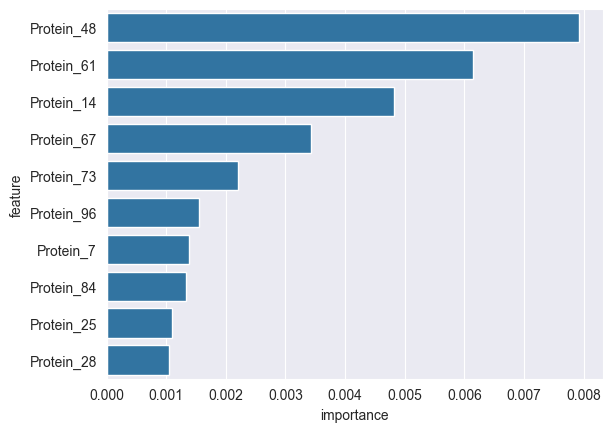

In [19]:
sns.barplot(x="importance", y="feature", data=feature_importances.sort_values("importance", ascending=False).head(10))

In [20]:
from dpks.interpretation import FeatureImportance

importance_calculator = FeatureImportance(
    n_iterations=3,
    feature_names=X.columns.values,
)

importance_calculator.fit(clf, X.values)

In [21]:
pca = UMAP(n_components=2, n_neighbors=5)

components = pca.fit_transform(importance_calculator.local_explanations.T)

In [22]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

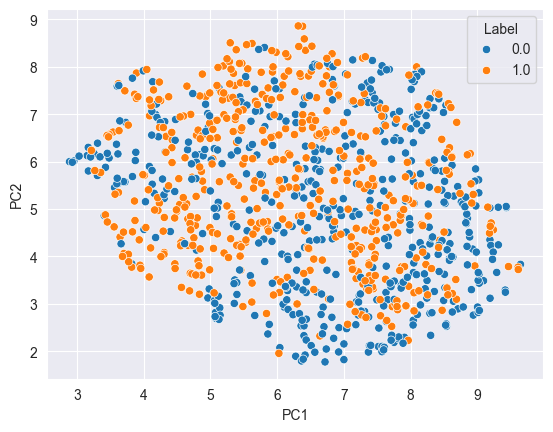

In [23]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [24]:
feature_importances['loss_importance'] = importance_calculator.global_explanations

<Axes: xlabel='loss_importance', ylabel='feature'>

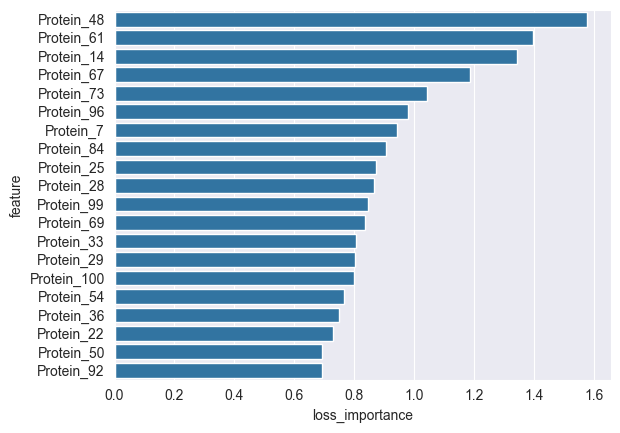

In [25]:
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(20),
    x="loss_importance",
    y="feature"
)

In [26]:
feature_importances['feature_num'] = feature_importances['feature'].str.split("_").str[-1].astype(int)

In [49]:
feature_importances['feature_type'] = np.where(feature_importances['feature_num'] <= 100, 1, 0)

In [50]:
import shap

In [51]:
explainer = shap.LinearExplainer(clf, X)
#explainer = shap.TreeExplainer(clf)
#explainer = shap.Explainer(clf)
shap_values = explainer(X)

In [52]:
feature_importances['shap_importance'] = np.mean(abs(shap_values.values), axis=0)

In [53]:
feature_importances.sort_values("shap_importance", ascending=False)

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
47,Protein_48,7.924884e-03,3.995640e-09,2.227215,1.577613,48,1,1.337691
60,Protein_61,6.153982e-03,7.987056e-11,2.409246,1.397487,61,1,1.226786
13,Protein_14,4.815323e-03,3.480136e-13,2.576504,1.343545,14,1,1.220000
66,Protein_67,3.425597e-03,1.394999e-08,2.022964,1.186605,67,1,1.056667
72,Protein_73,2.202603e-03,5.502114e-04,1.307851,1.044687,73,1,0.908446
...,...,...,...,...,...,...,...,...
2852,Protein_2853,-2.834595e-10,8.020836e-01,0.016072,0.000025,2853,0,0.000022
4799,Protein_4800,1.040480e-10,2.143995e-01,0.078813,0.000023,4800,0,0.000020
4402,Protein_4403,-2.718564e-10,8.856628e-01,0.009029,0.000010,4403,0,0.000008
2544,Protein_2545,8.048854e-11,4.651445e-01,0.046096,0.000006,2545,0,0.000006


<Axes: xlabel='shap_importance', ylabel='feature'>

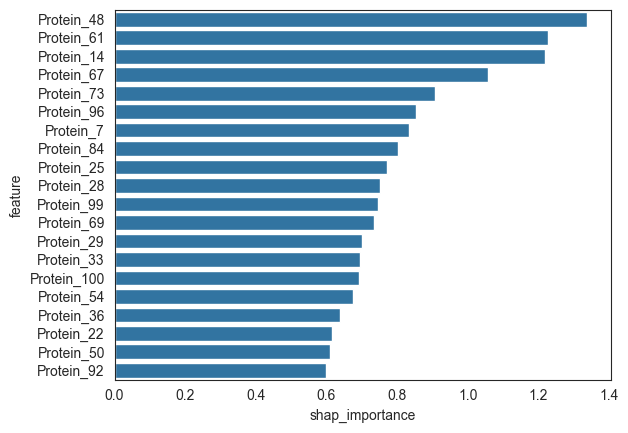

In [54]:
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(20),
    x="shap_importance",
    y="feature"
)

In [55]:
feature_importances

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
0,Protein_1,3.185547e-05,0.207079,0.449610,0.195006,1,1,0.171295
1,Protein_2,3.475141e-06,0.634612,0.171962,0.062319,2,1,0.055919
2,Protein_3,1.004299e-04,0.003356,1.047580,0.347389,3,1,0.302177
3,Protein_4,-1.901993e-07,0.703464,0.149161,0.007380,4,1,0.006427
4,Protein_5,4.098872e-04,0.000831,1.213110,0.626035,5,1,0.535875
...,...,...,...,...,...,...,...,...
5995,Protein_5996,1.599117e-06,0.220213,0.077153,0.023388,5996,0,0.020879
5996,Protein_5997,3.772329e-07,0.672274,0.027629,0.023083,5997,0,0.019788
5997,Protein_5998,2.965156e-07,0.263344,0.069923,0.012245,5998,0,0.010443
5998,Protein_5999,-4.519317e-08,0.755868,0.020111,0.010301,5999,0,0.008907


[]

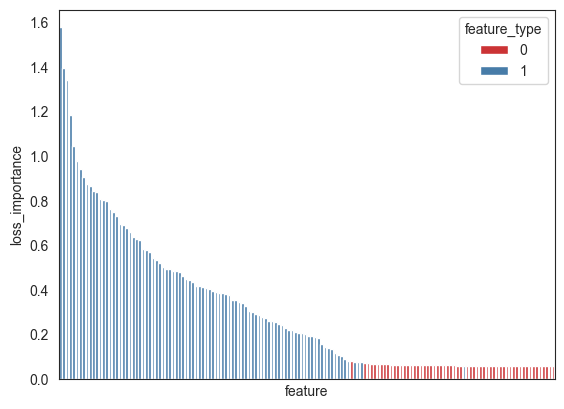

In [56]:
sns.set_style("white")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(150),
    x="feature",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])


[]

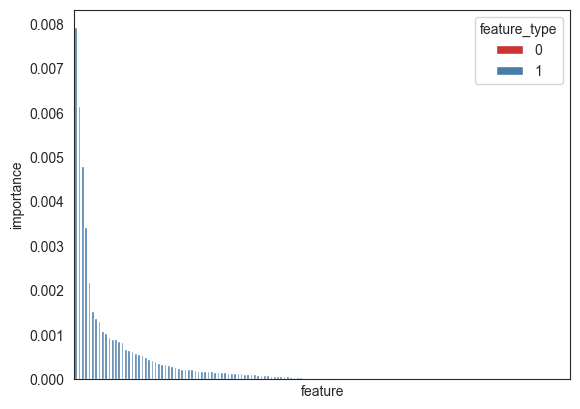

In [57]:
sns.set_style("white")

fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("importance", ascending=False).head(150),
    x="feature",
    y="importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

[]

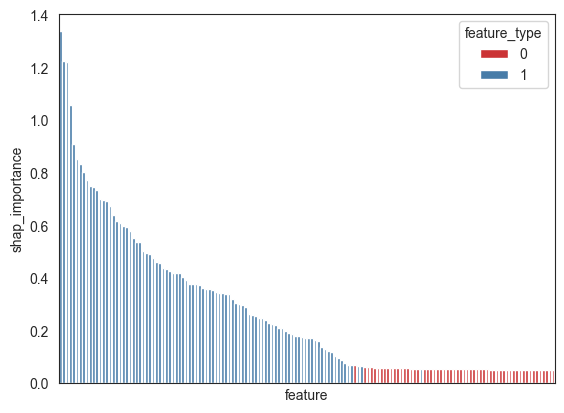

In [58]:
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(150),
    x="feature",
    y="shap_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

<Axes: xlabel='shap_importance', ylabel='loss_importance'>

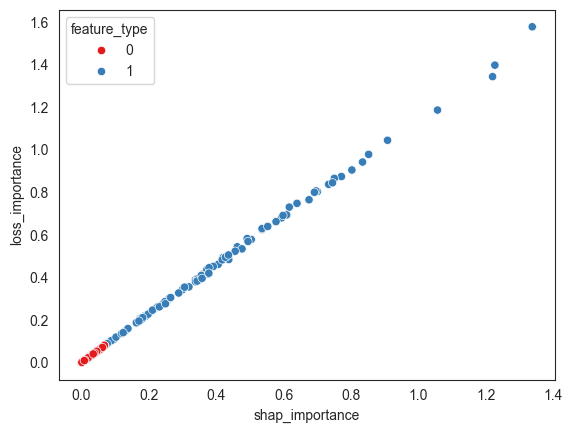

In [59]:
sns.scatterplot(
    data=feature_importances,
    x="shap_importance",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
)

<Axes: xlabel='importance', ylabel='loss_importance'>

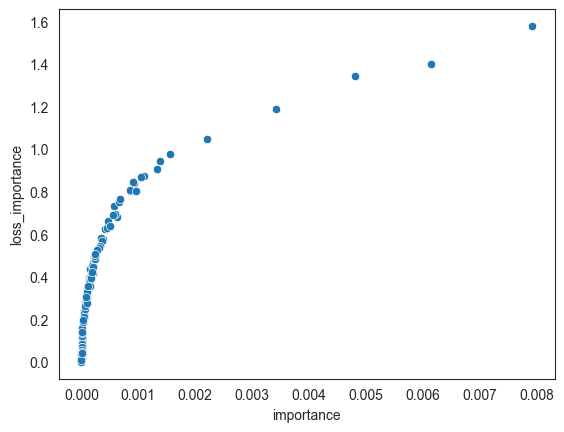

In [60]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='shap_importance'>

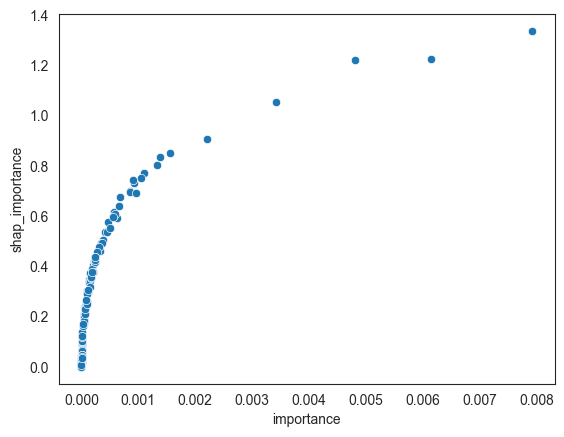

In [61]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="shap_importance",
)

In [66]:
loss_top = feature_importances.sort_values('loss_importance', ascending=False).head(100)
loss_top[loss_top['feature_num'] > 100].shape[0]

9

In [67]:
importance_top = feature_importances.sort_values('importance', ascending=False).head(100)
importance_top[importance_top['feature_num'] > 100].shape[0]

15

In [68]:
shap_top = feature_importances.sort_values('shap_importance', ascending=False).head(100)
shap_top[shap_top['feature_num'] > 100].shape[0]

9

In [90]:
feature_importances['linear_weights'] = np.abs(clf.coef_.ravel())

In [91]:
linear_top = feature_importances.sort_values('linear_weights', ascending=False).head(100)
linear_top[linear_top['feature_num'] > 100].shape[0]

45

<Axes: xlabel='loss_importance', ylabel='linear_weights'>

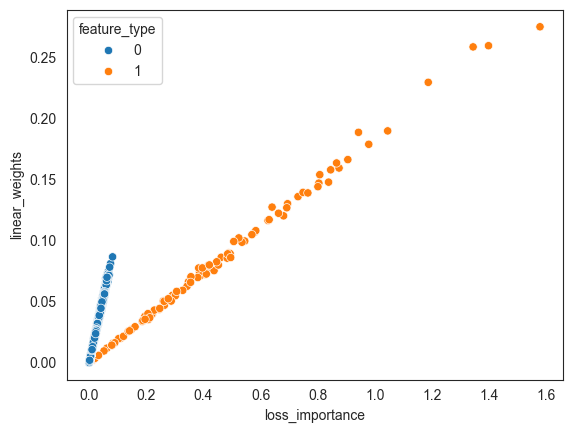

In [92]:
sns.scatterplot(
    data=feature_importances,
    x="loss_importance",
    y="linear_weights",
    hue="feature_type",
)

In [95]:
import lime
import lime.lime_tabular

In [104]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,
    feature_names=X.columns.values,
    class_names=np.unique(y),
    mode="classification",
)

In [ ]:
explanations = []

for i in range(len(X)):
    exp = explainer.explain_instance(
        data_row=X.iloc[i],
        predict_fn=clf.predict_proba,
        num_features=len(X.columns.values),
    )
    explanations.append(dict(exp.as_list()))

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

In [106]:
explanations

[]